# LangGraph 101

[LLMs](https://python.langchain.com/docs/concepts/chat_models/) make it possible to embed intelligence into a new class of applications. [LangGraph](https://langchain-ai.github.io/langgraph/) is a framework to help build applications with LLMs. Here, we will overview the basics of LangGraph, explain its benefits, show how to use it to build workflows / agents, and show how it works with [LangChain](https://www.langchain.com/) / [LangSmith](https://docs.smith.langchain.com/).

![ecosystem](./img/ecosystem.png)

## Chat models

[Chat models](https://python.langchain.com/docs/concepts/chat_models/) are the foundation of LLM applications. They are typically accessed through a chat interface that takes a list of [messages](https://python.langchain.com/docs/concepts/messages/) as input and returns a [message](https://python.langchain.com/docs/concepts/messages/) as output. LangChain provides [a standardized interface for chat models](https://python.langchain.com/api_reference/langchain/chat_models/langchain.chat_models.base.init_chat_model.html), making it easy to [access many different providers](https://python.langchain.com/docs/integrations/chat/).

In [1]:
### Mount Notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
# change the working directory to the Drive root
%cd /content/drive/My\ Drive/Colab\ Notebooks/agents-from-scratch-main

/content/drive/My Drive/Colab Notebooks/agents-from-scratch-main


In [3]:
!pip install --quiet python-dotenv

In [23]:
!pip install -U "langchain[google-genai]"

In [22]:
!pip install -U langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 16.7 MB/s eta 0:00:00


In [36]:
from dotenv import load_dotenv
load_dotenv("../.env", override=True)

True

In [8]:
from langchain.chat_models import init_chat_model
#llm = init_chat_model("openai:gpt-4.1", temperature=0)
llm = init_chat_model("google_genai:gemini-2.0-flash")


## Running the model

The `init_chat_model` interface provides [standardized](https://python.langchain.com/docs/concepts/runnables/) methods for using chat models, which include:
- `invoke()`: A single input is transformed into an output.
- `stream()`: Outputs are [streamed](https://python.langchain.com/docs/concepts/streaming/#stream-and-astream) as they are produced.

In [9]:
result = llm.invoke("What is an agent?")

In [10]:
type(result)

langchain_core.messages.ai.AIMessage

In [11]:
from rich.markdown import Markdown
Markdown(result.content)

The term "agent" is used in a variety of fields, but the core concept remains the same: an agent is an entity that 
can perceive its environment and act upon it to achieve a specific goal.                                           

Here's a breakdown of what that means and how it applies in different contexts:                                    

Core Components of an Agent:                                                                                       

 • Perception: The ability to sense or gather information about the environment. This can involve sensors (in the  
   case of physical agents) or data input (in the case of software agents).                                        
 • Environment: The surroundings that the agent exists within and interacts with.                                  
 • Action: The capability to perform actions that affect the environment.  This can be physical movement, data     
   manipulation, communication, or any other change that the agent can initiate.                                   
 • Goal:  A specific objective or set of objectives that the agent is trying to achieve.                           
 • Decision-Making: The logic or algorithm that the agent uses to determine which action to take based on its      
   perception, current state, and goal.                                                                            

Examples of Agents in Different Fields:                                                                            

 • Artificial Intelligence (AI):                                                                                   
    • Software Agents: Programs designed to automate tasks, gather information, or interact with users. Examples   
      include:                                                                                                     
       • Search engine bots (crawlers)                                                                             
       • Chatbots                                                                                                  
       • Personal assistants (Siri, Alexa)                                                                         
       • Recommendation systems                                                                                    
       • Trading bots                                                                                              
    • Robotics: Physical robots that can perceive their environment through sensors (cameras, lidar, etc.) and act 
      upon it using motors, actuators, etc. Examples include:                                                      
       • Industrial robots                                                                                         
       • Autonomous vehicles                                                                                       
       • Service robots (cleaning robots, delivery robots)                                                         
 • Economics:                                                                                                      
    • Economic Agents: Individuals, firms, or governments that make decisions that affect the economy. They        
      perceive economic signals (prices, interest rates, etc.) and act to maximize their own utility or profit.    
 • Game Theory:                                                                                                    
    • Players:  Individuals or entities that make choices in a strategic setting, with the goal of maximizing their
      own payoff.                                                                                                  
 • Multi-Agent Systems (MAS): Systems composed of multiple agents that interact with each other to achieve a common
   goal or individual goals in a shared environment.  These agents may cooperate, compete, or coordinate their     
   actions.                                        

## Tools

[Tools](https://python.langchain.com/docs/concepts/tools/) are utilities that can be called by a chat model. In LangChain, creating tools can be done using the `@tool` decorator, which transforms Python functions into callable tools. It will automatically infer the tool's name, description, and expected arguments from the function definition. You can also use [Model Context Protocol (MCP) servers](https://github.com/langchain-ai/langchain-mcp-adapters) as LangChain-compatible tools.

In [12]:
from langchain.tools import tool

@tool
def write_email(to: str, subject: str, content: str) -> str:
    """Write and send an email."""
    # Placeholder response - in real app would send email
    return f"Email sent to {to} with subject '{subject}' and content: {content}"

In [13]:
type(write_email)

langchain_core.tools.structured.StructuredTool

In [14]:
write_email.args

{'to': {'title': 'To', 'type': 'string'},
 'subject': {'title': 'Subject', 'type': 'string'},
 'content': {'title': 'Content', 'type': 'string'}}

In [15]:
Markdown(write_email.description)

Write and send an email.

## Tool Calling

Tools can be [called](https://python.langchain.com/docs/concepts/tool_calling/) by LLMs. When a tool is bound to the model, the model can choose to call the tool by returning a structured output with tool arguments. We use the `bind_tools` method to augment an LLM with tools.

![tool-img](img/tool_call_detail.png)

Providers often have [parameters such as `tool_choice`](https://python.langchain.com/docs/how_to/tool_choice/) to enforce calling specific tools. `any` will select at least one of the tools.

In addition, we can [set `parallel_tool_calls=False`](https://python.langchain.com/docs/how_to/tool_calling_parallel/) to ensure the model will only call one tool at a time.

In [16]:
# Connect tools to a chat model
model_with_tools = llm.bind_tools([write_email], tool_choice="any", parallel_tool_calls=False)

# The model will now be able to call tools
output = model_with_tools.invoke("Draft a response to my boss (boss@company.ai) about tomorrow's meeting")

In [17]:
type(output)

langchain_core.messages.ai.AIMessage

In [18]:
output

AIMessage(content='', additional_kwargs={'function_call': {'name': 'write_email', 'arguments': '{"to": "boss@company.ai", "content": "Hi Boss,\\n\\nI\'m writing to confirm our meeting tomorrow. I\'m looking forward to it.\\n\\nBest,\\n[Your Name]", "subject": "Regarding tomorrow\'s meeting"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--8d2b537d-cdb7-4e37-8196-30a5c73b6a36-0', tool_calls=[{'name': 'write_email', 'args': {'to': 'boss@company.ai', 'content': "Hi Boss,\n\nI'm writing to confirm our meeting tomorrow. I'm looking forward to it.\n\nBest,\n[Your Name]", 'subject': "Regarding tomorrow's meeting"}, 'id': '0bfe0ea0-a6ad-4d1f-823a-9a00576dd521', 'type': 'tool_call'}], usage_metadata={'input_tokens': 37, 'output_tokens': 46, 'total_tokens': 83, 'input_token_details': {'cache_read': 0}})

In [19]:
# Extract tool calls and execute them
args = output.tool_calls[0]['args']
args

{'to': 'boss@company.ai',
 'content': "Hi Boss,\n\nI'm writing to confirm our meeting tomorrow. I'm looking forward to it.\n\nBest,\n[Your Name]",
 'subject': "Regarding tomorrow's meeting"}

In [20]:
# Call the tool
result = write_email.invoke(args)
Markdown(result)

Email sent to boss@company.ai with subject 'Regarding tomorrow's meeting' and content: Hi Boss,                    

I'm writing to confirm our meeting tomorrow. I'm looking forward to it.                                            

Best, [Your Name]

![basic_prompt](img/tool_call.png)

## Workflows

There are many patterns for building applications with LLMs.

[We can embed LLM calls into pre-defined workflows](https://langchain-ai.github.io/langgraph/tutorials/workflows/), giving the system more agency to make decisions.

As an example, we could add a router step to determine whether to write an email or not.

![workflow_example](img/workflow_example.png)

## Agents

We can further increase agency, allowing the LLM to dynamically direct its own tool usage.

[Agents](https://langchain-ai.github.io/langgraph/tutorials/workflows/#agent) are typically implemented as tool calling in a loop, where the output of each tool call is used to inform the next action.

![agent_example](img/agent_example.png)

Agents are well suited to open-ended problems where it's difficult to predict the *exact* steps needed in advance.

Workflows are often appropriate when the control flow can easily be defined in advance.

![workflow_v_agent](img/workflow_v_agent.png)

## What is LangGraph?

[LangGraph](https://langchain-ai.github.io/langgraph/concepts/high_level/) provides low-level supporting infrastructure that sits underneath *any* workflow or agent.

It does not abstract prompts or architecture, and provides a few benefits:

- **Control**: Make it easy to define and / or combine agents and workflows.
- **Persistence**: Provide a way to persist the state of a graph, which enables both memory and human-in-the-loop.
- **Testing, Debugging, and Deployment**: Provide an easy onramp for testing, debugging, and deploying applications.

### Control

LangGraph lets you define your application as a graph with:

1. *State*: What information do we need to track over the course of the application?
2. *Nodes*: How do we want to update this information over the course of the application?
3. *Edges*: How do we want to connect these nodes together?

We can use the [`StateGraph` class](https://langchain-ai.github.io/langgraph/concepts/low_level/#graphs) to initialize a LangGraph graph with a [`State` object](https://langchain-ai.github.io/langgraph/concepts/low_level/#state).

`State` defines the schema for information we want to track over the course of the application.

This can be any object with `getattr()` in python, such as a dictionary, dataclass, or Pydantic object:

- TypeDict is fastest but doesn’t support defaults
- Dataclass is basically as fast, supports dot syntax `state.foo`, and has defaults.
- Pydantic is slower (especially with custom validators) but gives type validation.

In [24]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

class StateSchema(TypedDict):
    request: str
    email: str

workflow = StateGraph(StateSchema)

Each node is simply a python function or typescript code. This gives us full control over the logic inside each node.

They receive the current state, and return a dictionary to update the state.

By default, [state keys are overwritten](https://langchain-ai.github.io/langgraph/how-tos/state-reducers/).

However, you can [define custom update logic](https://langchain-ai.github.io/langgraph/concepts/low_level/#reducers).

![nodes_edges](img/nodes_edges.png)

In [25]:
def write_email_node(state: StateSchema) -> StateSchema:
    # Imperative code that processes the request
    output = model_with_tools.invoke(state["request"])
    args = output.tool_calls[0]['args']
    email = write_email.invoke(args)
    return {"email": email} # update the state, it overwrites the previous value

Edges connect nodes together.

We specify the control flow by adding edges and nodes to our state graph.

In [26]:
workflow = StateGraph(StateSchema)
workflow.add_node("write_email_node", write_email_node)
workflow.add_edge(START, "write_email_node")
workflow.add_edge("write_email_node", END)

app = workflow.compile()

In [27]:
app.invoke({"request": "Draft a response to my boss (boss@company.ai) about tomorrow's meeting"})

{'request': "Draft a response to my boss (boss@company.ai) about tomorrow's meeting",
 'email': "Email sent to boss@company.ai with subject 'Re: Tomorrow's Meeting' and content: Hi Boss,\n\nI'm looking forward to our meeting tomorrow.\n\nBest,\n[Your Name]"}

### Conditional Routing

Routing between nodes can be done [conditionally](https://langchain-ai.github.io/langgraph/concepts/low_level/#conditional-edges) using a simple function.

The return value of this function is used as the name of the node (or list of nodes) to send the state to next.

You can optionally provide a dictionary that maps the `should_continue` output to the name of the next node.

In [38]:
!pip install html2text

In [39]:
from typing import Literal
from langgraph.graph import MessagesState
from email_assistant.utils import show_graph

def call_llm(state: MessagesState) -> MessagesState:
    """Run LLM"""

    output = model_with_tools.invoke(state["messages"])
    return {"messages": [output]} # append to messages list, as suppose to overwriting previous value

def run_tool(state: MessagesState):
    """Performs the tool call"""

    result = []
    for tool_call in state["messages"][-1].tool_calls:
        observation = write_email.invoke(tool_call["args"])
        result.append({"role": "tool", "content": observation, "tool_call_id": tool_call["id"]})
    return {"messages": result}

def should_continue(state: MessagesState) -> Literal["run_tool", "__end__"]:
    """Route to tool handler, or end if Done tool called"""

    # Get the last message
    messages = state["messages"]
    last_message = messages[-1]

    # If the last message is a tool call, check if it's a Done tool call
    if last_message.tool_calls:
        return "run_tool"
    # Otherwise, we stop (reply to the user)
    return END # with conditional edges, we retrun the name of the next node you want to visit
    # But with nodes, we return updates to your state

workflow = StateGraph(MessagesState)
workflow.add_node("call_llm", call_llm)
workflow.add_node("run_tool", run_tool)
workflow.add_edge(START, "call_llm")
workflow.add_conditional_edges("call_llm", should_continue, {"run_tool": "run_tool", END: END})
workflow.add_edge("run_tool", END)

# Run the workflow
app = workflow.compile()

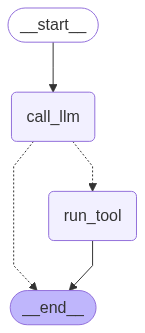

In [40]:
show_graph(app)

In [41]:
result = app.invoke({"messages": [{"role": "user", "content": "Draft a response to my boss (boss@company.ai) confirming that I want to attend Interrupt!"}]})
for m in result["messages"]:
    m.pretty_print()

================================ Human Message =================================

Draft a response to my boss (boss@company.ai) confirming that I want to attend Interrupt!
================================== Ai Message ==================================
Tool Calls:
  write_email (86664c2c-d47c-4e1d-ae98-e1dc997c92da)
 Call ID: 86664c2c-d47c-4e1d-ae98-e1dc997c92da
  Args:
    to: boss@company.ai
    content: Hi Boss,

This email confirms that I will be attending Interrupt!.

Thanks,
[Your Name]
    subject: Interrupt! Confirmation
================================= Tool Message =================================

Email sent to boss@company.ai with subject 'Interrupt! Confirmation' and content: Hi Boss,

This email confirms that I will be attending Interrupt!.

Thanks,
[Your Name]


With these low level components, you can build many many different workflows and agents. See [this tutorial](https://langchain-ai.github.io/langgraph/tutorials/workflows/)!

Because agents are such a common pattern, [LangGraph](https://langchain-ai.github.io/langgraph/tutorials/workflows/#pre-built) has [a pre-built agent](https://langchain-ai.github.io/langgraph/agents/overview/?ref=blog.langchain.dev#what-is-an-agent) abstraction.

With LangGraph's [pre-built method](https://langchain-ai.github.io/langgraph/tutorials/workflows/#pre-built), we just pass in the LLM, tools, and prompt.

In [42]:
from langgraph.prebuilt import create_react_agent

agent = create_react_agent(
    model=llm,
    tools=[write_email],
    prompt="Respond to the user's request using the tools provided."
)

# Run the agent
result = agent.invoke(
    {"messages": [{"role": "user", "content": "Draft a response to my boss (boss@company.ai) confirming that I want to attend Interrupt!"}]}
)

for m in result["messages"]:
    m.pretty_print()

================================ Human Message =================================

Draft a response to my boss (boss@company.ai) confirming that I want to attend Interrupt!
================================== Ai Message ==================================

Okay, I can help you with that. What is the subject and content of the email you would like me to send to your boss?


### Persistence

#### Threads

It can be very useful to allow agents to pause during long running tasks.

LangGraph has a built-in persistence layer, implemented through checkpointers, to enable this.

When you compile graph with a checkpointer, the checkpointer saves a [checkpoint](https://langchain-ai.github.io/langgraph/concepts/persistence/#checkpoints) of the graph state at every step.

Checkpoints are saved to a thread, which can be accessed after graph execution completes.

![checkpointer](img/checkpoints.png)

We compile the graph with a [checkpointer](https://langchain-ai.github.io/langgraph/concepts/persistence/#checkpointer-libraries).


In [43]:
from langgraph.checkpoint.memory import InMemorySaver

agent = create_react_agent(
    model=llm,
    tools=[write_email],
    prompt="Respond to the user's request using the tools provided.",
    checkpointer=InMemorySaver()
)

config = {"configurable": {"thread_id": "1"}}
result = agent.invoke({"messages": [{"role": "user", "content": "What are some good practices for writing emails?"}]}, config)

In [44]:
# Get the latest state snapshot
config = {"configurable": {"thread_id": "1"}}
state = agent.get_state(config)
for message in state.values['messages']:
    message.pretty_print()

================================ Human Message =================================

What are some good practices for writing emails?
================================== Ai Message ==================================

I can help you with that! I can write an email for you, but I don't have the capability to provide advice on good practices for writing emails.


In [45]:
# Continue the conversation
result = agent.invoke({"messages": [{"role": "user", "content": "Good, let's use lesson 3 to craft a response to my boss confirming that I want to attend Interrupt"}]}, config)
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

What are some good practices for writing emails?
================================== Ai Message ==================================

I can help you with that! I can write an email for you, but I don't have the capability to provide advice on good practices for writing emails.
================================ Human Message =================================

Good, let's use lesson 3 to craft a response to my boss confirming that I want to attend Interrupt
================================== Ai Message ==================================

I am sorry, I do not have the ability to access lesson 3. Can you provide me with the content of the email you would like me to send to your boss?


In [46]:
# Continue the conversation
result = agent.invoke({"messages": [{"role": "user", "content": "I like this, let's write the email to boss@company.ai"}]}, config)
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

What are some good practices for writing emails?
================================== Ai Message ==================================

I can help you with that! I can write an email for you, but I don't have the capability to provide advice on good practices for writing emails.
================================ Human Message =================================

Good, let's use lesson 3 to craft a response to my boss confirming that I want to attend Interrupt
================================== Ai Message ==================================

I am sorry, I do not have the ability to access lesson 3. Can you provide me with the content of the email you would like me to send to your boss?
================================ Human Message =================================

I like this, let's write the email to boss@company.ai
================================== Ai Message ==================================

Okay, I'm ready

#### Interrupts

In LangGraph, we can also use [interrupts](https://langchain-ai.github.io/langgraph/how-tos/human_in_the_loop/wait-user-input/) to stop graph execution at specific points.

Often this is used to collect input from a user and continue execution with collected input.

In [47]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

from langgraph.types import Command, interrupt
from langgraph.checkpoint.memory import InMemorySaver

class State(TypedDict):
    input: str
    user_feedback: str

def step_1(state):
    print("---Step 1---")
    pass

def human_feedback(state):
    print("---human_feedback---")
    feedback = interrupt("Please provide feedback:")
    return {"user_feedback": feedback}

def step_3(state):
    print("---Step 3---")
    pass

builder = StateGraph(State)
builder.add_node("step_1", step_1)
builder.add_node("human_feedback", human_feedback)
builder.add_node("step_3", step_3)
builder.add_edge(START, "step_1")
builder.add_edge("step_1", "human_feedback")
builder.add_edge("human_feedback", "step_3")
builder.add_edge("step_3", END)

# Set up memory
memory = InMemorySaver()

# Add
graph = builder.compile(checkpointer=memory)

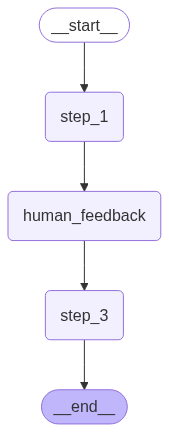

In [48]:
show_graph(graph)

In [49]:
# Input
initial_input = {"input": "hello world"}

# Thread
thread = {"configurable": {"thread_id": "1"}}

# Run the graph until the first interruption
for event in graph.stream(initial_input, thread, stream_mode="updates"):
    print(event)
    print("\n")

---Step 1---
{'step_1': None}


---human_feedback---
{'__interrupt__': (Interrupt(value='Please provide feedback:', id='b98c366d43ae884467a01863ed16dc00'),)}




To resume from an interrupt, we can use [the `Command` object](https://langchain-ai.github.io/langgraph/how-tos/command/).

We'll use it to resume the graph from the interrupted state, passing the value to return from the interrupt call to `resume`.

In [50]:
# Continue the graph execution
for event in graph.stream(
    Command(resume="go to step 3!"),
    thread,
    stream_mode="updates",
):
    print(event)
    print("\n")

---human_feedback---
{'human_feedback': {'user_feedback': 'go to step 3!'}}


---Step 3---
{'step_3': None}




### Tracing

When we are using LangChain or LangGraph, LangSmith logging [will work out of the box](https://docs.smith.langchain.com/observability/how_to_guides/trace_with_langgraph) with the following environment variables set:

```
export LANGSMITH_TRACING=true
export LANGSMITH_API_KEY="<your-langsmith-api-key>"
```

Here is the LangSmith trace from above agent execution:

https://smith.langchain.com/public/6f77014f-d054-44ed-aa2c-8b06ceab689f/r

We can see that the agent is able to continue the conversation from the previous state because we used a checkpointer.

### Deployment

We can also deploy our graph using [LangGraph Platform](https://langchain-ai.github.io/langgraph/concepts/langgraph_platform/).

This creates a server [with an API](https://langchain-ai.github.io/langgraph/cloud/reference/api/api_ref.html) that we can use to interact with our graph and an interactive IDE, LangGraph [Studio](https://langchain-ai.github.io/langgraph/concepts/langgraph_studio/).

We simply need to ensure our project has [a structure](https://langchain-ai.github.io/langgraph/concepts/application_structure/) like this:

```
my-app/
├── src/email_assistant # all project code lies within here
│   └── langgraph101.py # code for constructing your graph
├── .env # environment variables
├── langgraph.json  # configuration file for LangGraph
└── pyproject.toml # dependencies for your project
```

The `langgraph.json` file specifies the dependencies, graphs, environment variables, and other settings required to start a LangGraph server.

To test this, let's deploy `langgraph_101.py`. We have it in our `langgraph.json` file in this repo:

```
 "langgraph101": "./src/email_assistant/langgraph_101.py:app",
```

For LangGraph Platform, there are a range of [deployment options](https://langchain-ai.github.io/langgraph/tutorials/deployment/):

* Local deployments can be started with `langgraph dev` from the root directory of the repo. Checkpoints are saved to the local filesystem.
* There are also various [self-hosted options](https://langchain-ai.github.io/langgraph/tutorials/deployment/#other-deployment-options).
* For hosted deployments, checkpoints are saved to Postgres using a postgres [checkpointer](https://langchain-ai.github.io/langgraph/concepts/persistence/#checkpointer-libraries).

Test:
```
Draft a response to my boss (boss@company.ai) confirming that I want to attent Interrupt!
```

In [51]:
# Python >= 3.11 is required.

!pip install --upgrade "langgraph-cli[inmem]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.0/206.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.2/452.2 kB 27.1 MB/s eta 0:00:00
  Created wheel for forbiddenfruit: filename=forbiddenfruit-0.1.4-py3-none-any.whl size=21789 sha256=ea106eac203653edbd05b80091bd03b5a66adad995eac3f8db40370f78b577bb
  Stored in directory: /root/.cache/pip/wheels/eb/1b/4e/1720775f695118457d0692cea72b8be2b8af2a7bae46611e93
Successfully built forbiddenfruit
  Attempting uninstall: sse-starlette
    Found existing installation: sse-starlette 3.0.2
    Uninstalling sse-starlette-3.0.2:
      Successfully uninstalled sse-starlette-3.0.2


In [ ]:
!

Here we can see a visualization of the graph as well as the graph state in Studio.

![langgraph_studio](img/langgraph_studio.png)

Also, you can see API docs for the local deployment here:

http://127.0.0.1:2024/docs